In [1]:
#1. 파일 읽어서 데이터프레임 생성
import pandas as pd
import numpy as np

features = pd.read_csv("C:/Users/TFG155/Desktop/인공지능개론/데이터/baseball_players.csv", index_col = 0, header=0)

In [2]:
features

,Team,Position,Height(inches),Weight(pounds),Age
Name,,,,,
Adam_Donachie,BAL,Catcher,74,180.0,22.99
Paul_Bako,BAL,Catcher,74,215.0,34.69
Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
Chris_Gomez,BAL,First_Baseman,73,188.0,35.71
...,...,...,...,...,...
Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19


In [3]:
#4. 포지션을 숫자로 변경
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in features.columns:
    features[i] = le.fit_transform(features[i])

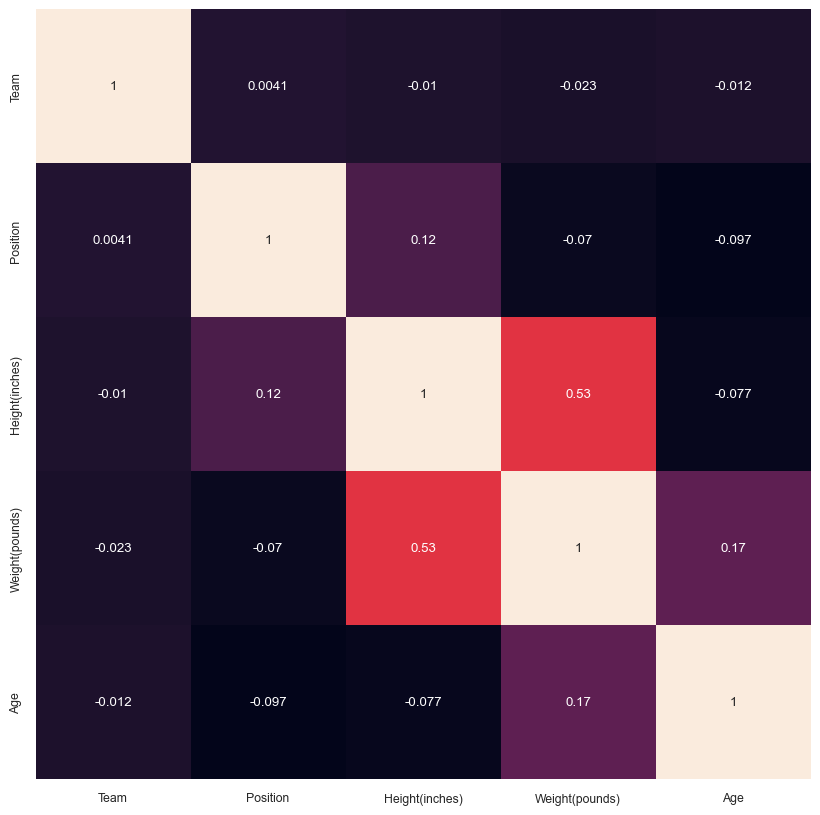

In [4]:
#2. EDA (label 갯수 확인)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.set(font_scale = 0.8)
sns.heatmap(features.corr(), annot=True,cbar=False)
plt.show()

<AxesSubplot:xlabel='Position', ylabel='count'>

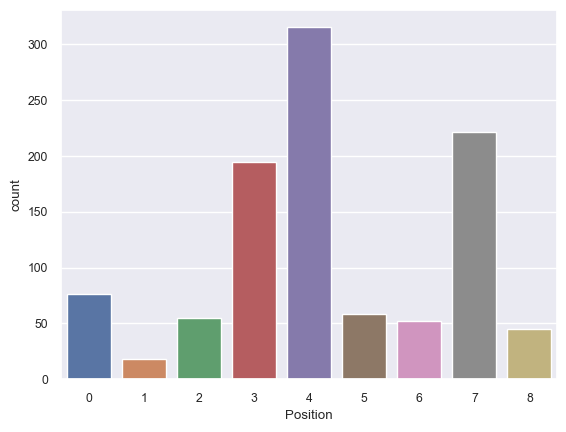

In [5]:
sns.countplot(data = features, x="Position")

<AxesSubplot:xlabel='Position', ylabel='Age'>

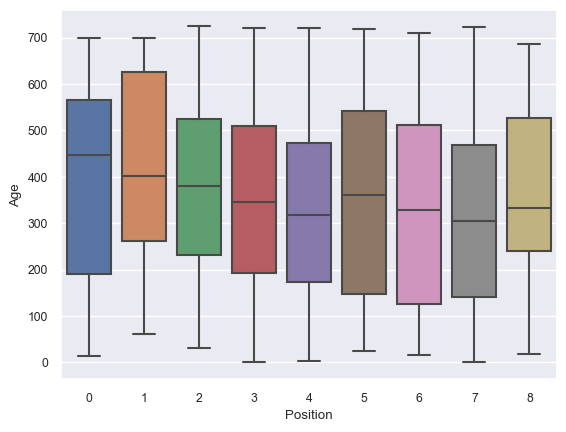

In [6]:
sns.boxplot(data = features, x="Position", y="Age")

In [7]:
y = features['Position']
X = features.drop('Position', axis=1)

X = X.to_numpy()
y = y.to_numpy()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [8]:
#3. 포시젼 분류

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- SVM Classifier ---
0.30115830115830117
[[ 0  0  0  0 24  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0]
 [ 0  0  0  0 39  0  0  0  0]
 [ 0  0  0  0 78  0  0  0  0]
 [ 0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0]
 [ 0  0  0  0 59  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  0]]

--- Logistic Regression Classifier ---
0.277992277992278
[[ 0  0  1  5 18  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0]
 [ 0  0  0  1 13  0  0  0  0]
 [ 0  0  1  4 34  0  0  0  0]
 [ 0  0  1  6 68  3  0  0  0]
 [ 0  0  0 10  7  0  0  0  0]
 [ 0  0  0  5  9  1  0  0  0]
 [ 0  0  2  1 54  1  1  0  0]
 [ 0  0  0  2  9  0  0  0  0]]

--- Decision Tree Classifier ---
0.2277992277992278
[[ 3  0  2  5 10  1  1  1  1]
 [ 0  0  0  0  2  0  0  0  0]
 [ 1  0  2  3  5  0  2  1  0]
 [ 4  2  2  4  9  0  5  9  4]
 [ 5  2  2 19 28  2  2 11  7]
 [ 0  0  0  7  4  2  0  3  1]
 [ 1  1  1  4  1  1  3  3  0]
 [ 6  2  1  5 25  0  2 15  3]
 [ 1  0  1  3  4  0  0  0  2]]

--- Radom Forest ---


c:\Users\TFG155\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.25096525096525096
[[ 1  0  1  6 13  1  0  2  0]
 [ 0  0  0  0  2  0  0  0  0]
 [ 1  0  0  2  5  1  1  4  0]
 [ 3  0  3 10 13  1  3  6  0]
 [ 1  0  2 17 39  3  2 13  1]
 [ 1  0  0  5  4  1  0  5  1]
 [ 1  0  0  3  3  4  2  2  0]
 [ 3  0  1  7 30  2  1 12  3]
 [ 0  1  1  2  5  1  1  0  0]]


In [9]:
#5. Regression 수행
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ly_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)


평균제곱근오차 2.169060466551467


In [10]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(dy_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 3.2143500637059326


In [11]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ry_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.262170260107379


In [12]:
from sklearn import svm

model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

sy_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(sy_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.2669690444839885
